# Step1: Import the Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data and read columns to understand the type of the data

In [4]:
df_cancer=pd.read_csv("Cancer_Data.csv")
df_cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df_cancer["Unnamed: 32"].isnull().sum()

569

#### Since Unnamed: 32 column as completed null values, dropping would be the best option

In [12]:
# dropping the Unnamed: 32 column
df_cancer.drop("Unnamed: 32",axis=1,inplace=True)

In [13]:
df_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
## Id can be dropped 
df_cancer.drop("id",axis=1,inplace=True)

In [17]:
df_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
# after removing the values check for the data types
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [19]:
# since target feature diagnosis is of object type we can convert it into integer
df_cancer["diagnosis"]=df_cancer["diagnosis"].map({'M':1,'B':0})

In [20]:
df_cancer["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

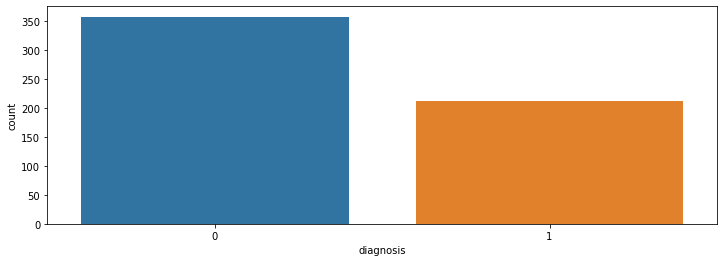

In [33]:
# check if the target feature has imbalance data set or not
plt.figure(figsize=(12,4))
sns.countplot(x='diagnosis',data=df_cancer)

### data set looks slighlt imbalanced we will go as it is

Text(0, 0.5, 'CancerDisease')

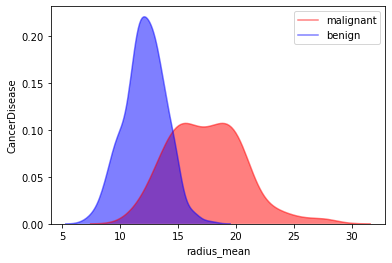

In [36]:
## since most of the data set has numerical feature, plot the KDE to understand the data distribution of each feature 
sns.kdeplot(df_cancer[df_cancer["diagnosis"]==1]["radius_mean"], alpha=0.5,shade = True, color="red", label="malignant")
sns.kdeplot(df_cancer[df_cancer["diagnosis"]==0]["radius_mean"],alpha=0.5,shade= True,color="blue",label="benign")
plt.xlabel("radius_mean")
plt.ylabel("CancerDisease")

In [39]:
def kde_numerical_features(target,feature):
    sns.kdeplot(df_cancer[df_cancer[target]==1][feature], alpha=0.5,shade = True, color="red", label="malignant")
    sns.kdeplot(df_cancer[df_cancer[target]==0][feature],alpha=0.5,shade= True,color="blue",label="benign")
    plt.xlabel(feature)
    plt.ylabel("CancerDisease")
    


C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
<ipython-input-46-a238a1949c02>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,4))
<ipython-input-46-a238a1949c02>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warn

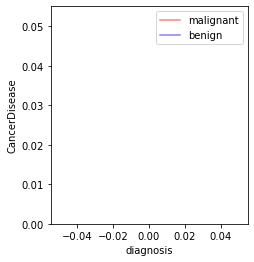

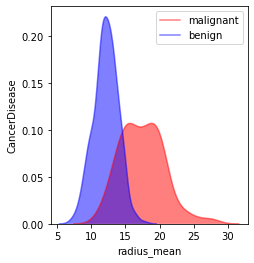

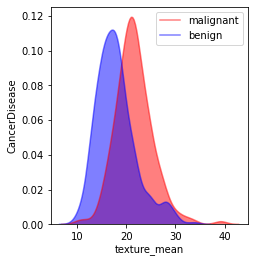

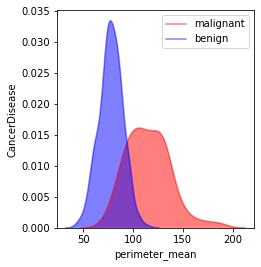

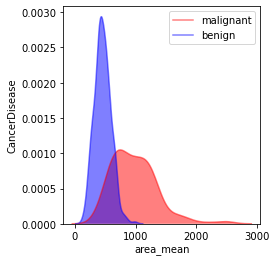

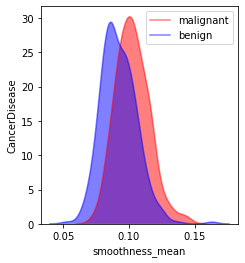

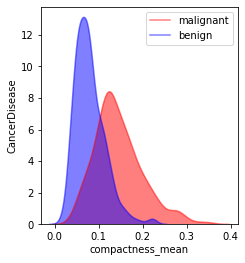

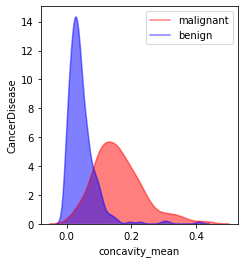

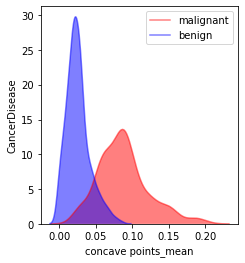

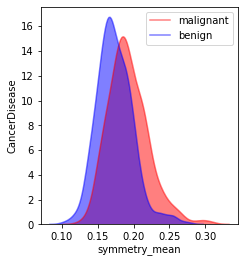

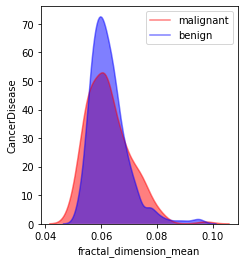

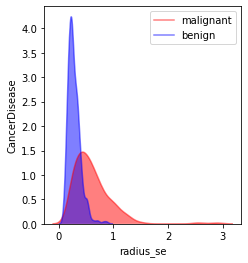

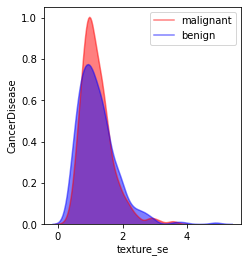

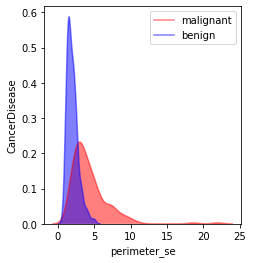

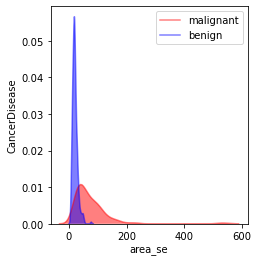

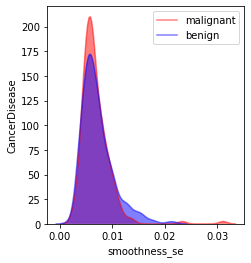

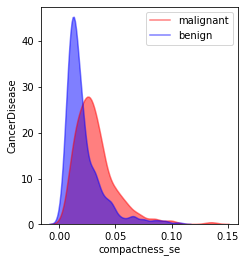

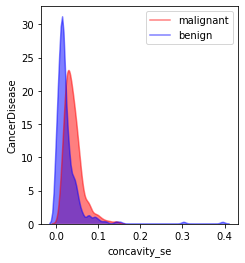

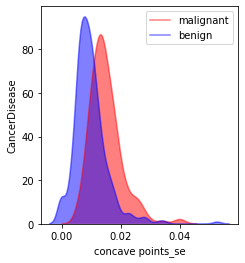

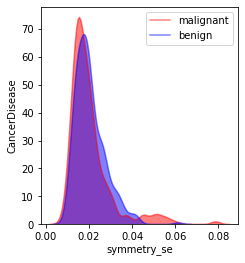

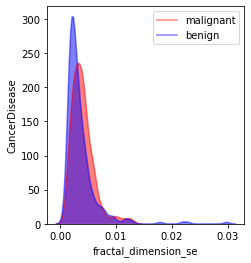

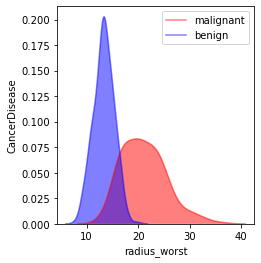

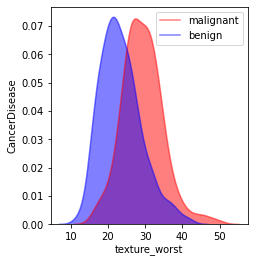

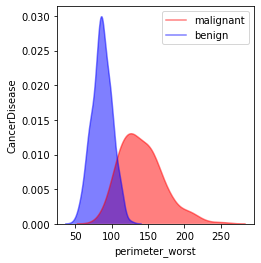

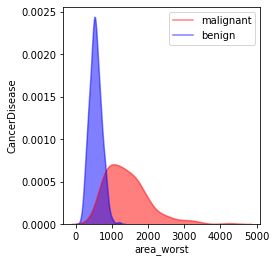

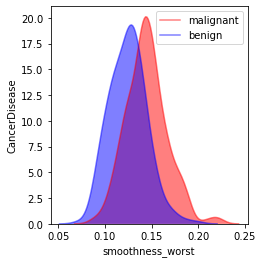

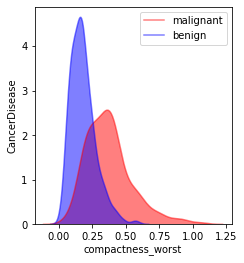

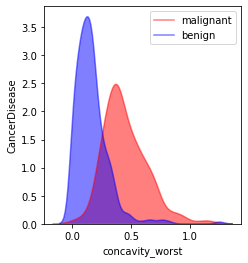

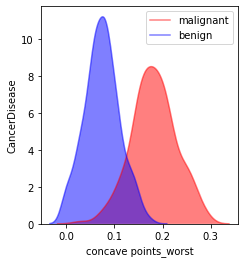

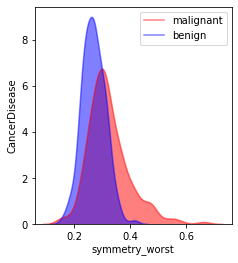

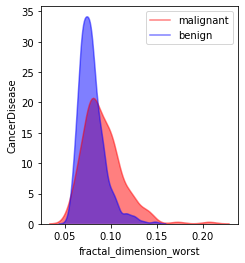

In [46]:
for feature in df_cancer:
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    kde_numerical_features("diagnosis",feature)
  

In [61]:
x=df_cancer
x=x.drop("diagnosis",axis=1)
x.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
y=df_cancer["diagnosis"]

In [65]:
## Spliting the data into x_train and y_train

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,plot_confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [64]:
## try to build the model using all feautes and check the accuracy, precision, recall f1 score
from sklearn.ensemble import RandomForestClassifier
cl_rf=RandomForestClassifier()
cl_rf.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
y_train_predict=cl_rf.predict(x_train)
y_test_predict=cl_rf.predict(x_test)

In [67]:
print("accuracy score of the modeil is:",accuracy_score(y_test,y_test_predict))

accuracy score of the modeil is: 0.9473684210526315


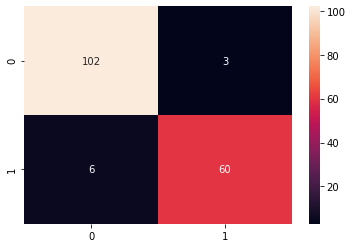

In [69]:
cm = confusion_matrix(y_test,cl_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [70]:
def metrics(actual,predicted):
    print("accuracy score of the model is:",accuracy_score(actual,predicted))
    print("precision score of the model is:",precision_score(actual,predicted))
    print("recall score of the model is:",recall_score(actual,predicted))
    print("f1 score of the model is:",f1_score(actual,predicted))

In [71]:
metrics(y_test,y_test_predict)

accuracy score of the model is: 0.9473684210526315
precision score of the model is: 0.9523809523809523
recall score of the model is: 0.9090909090909091
f1 score of the model is: 0.9302325581395349


### Since recall score of the model is 90 % we make wrong predictions hence choose the best features 

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [75]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [1.97037465e+02 8.06614964e+01 1.49156227e+03 4.00892002e+04
 1.10104737e-01 4.08752221e+00 1.43640005e+01 7.63006041e+00
 1.71825793e-01 1.47179510e-05 2.77086890e+01 3.20812927e-01
 1.97296167e+02 6.58618794e+03 3.27261819e-04 5.42117631e-01
 7.87642571e-01 2.14712560e-01 1.32628867e-03 1.07738854e-02
 3.53218948e+02 1.38596795e+02 2.64037262e+03 8.09351905e+04
 2.46851563e-01 1.34249793e+01 2.69226237e+01 9.00798688e+00
 7.36601047e-01 1.69333231e-01]
Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'c

In [86]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

Accuracy is:  0.8947368421052632


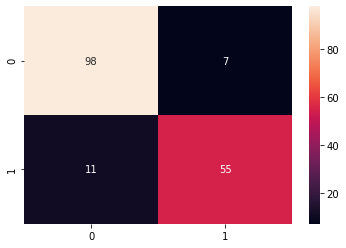

In [87]:
cl_rf2=RandomForestClassifier()
cl_rf2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,cl_rf2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,cl_rf2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")


In [88]:
y_test2_predict=cl_rf2.predict(x_test_2)

In [91]:
metrics(y_test,y_test2_predict)

accuracy score of the model is: 0.8947368421052632
precision score of the model is: 0.8870967741935484
recall score of the model is: 0.8333333333333334
f1 score of the model is: 0.859375


### lets model using only 5 features 

In [92]:
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [94]:
df_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [97]:
x_feature=df_cancer.iloc[:,[1,3,4,6,8]]

In [98]:
x_feature

,radius_mean,perimeter_mean,area_mean,compactness_mean,concave points_mean
0,17.99,122.80,1001.0,0.27760,0.14710
1,20.57,132.90,1326.0,0.07864,0.07017
2,19.69,130.00,1203.0,0.15990,0.12790
3,11.42,77.58,386.1,0.28390,0.10520
4,20.29,135.10,1297.0,0.13280,0.10430
...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.13890
565,20.13,131.20,1261.0,0.10340,0.09791
566,16.60,108.30,858.1,0.10230,0.05302
567,20.60,140.10,1265.0,0.27700,0.15200


In [99]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [100]:
train_x,test_x,train_y,test_y=train_test_split(x_feature,y,test_size=0.3,random_state=30)

In [101]:
cl_random=RandomForestClassifier(n_estimators=100)
cl_random.fit(train_x,train_y)

RandomForestClassifier()

In [102]:
y_rf_test_pred=cl_random.predict(test_x)

In [104]:
metrics(test_y,y_rf_test_pred)

accuracy score of the model is: 0.9122807017543859
precision score of the model is: 0.8852459016393442
recall score of the model is: 0.8709677419354839
f1 score of the model is: 0.8780487804878049


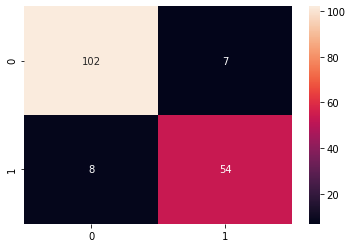

In [105]:
cm3=confusion_matrix(test_y,y_rf_test_pred)
sns.heatmap(cm3,annot=True,fmt="d")